
Population vs County (sorted by County)
  County Population
   Adair      18887
   Allen      20773
Anderson      23839
 Ballard       7742
  Barren      44511

Population vs County (sorted by Population)
   County Population
Jefferson     779232
  Fayette     321276
   Kenton     169066
    Boone     136150
   Warren     135307

The most populated counties in Kentucky are:
['Jefferson', 'Fayette', 'Kenton', 'Boone', 'Warren', 'Hardin', 'Daviess', 'Campbell', 'Madison', 'Bullitt']


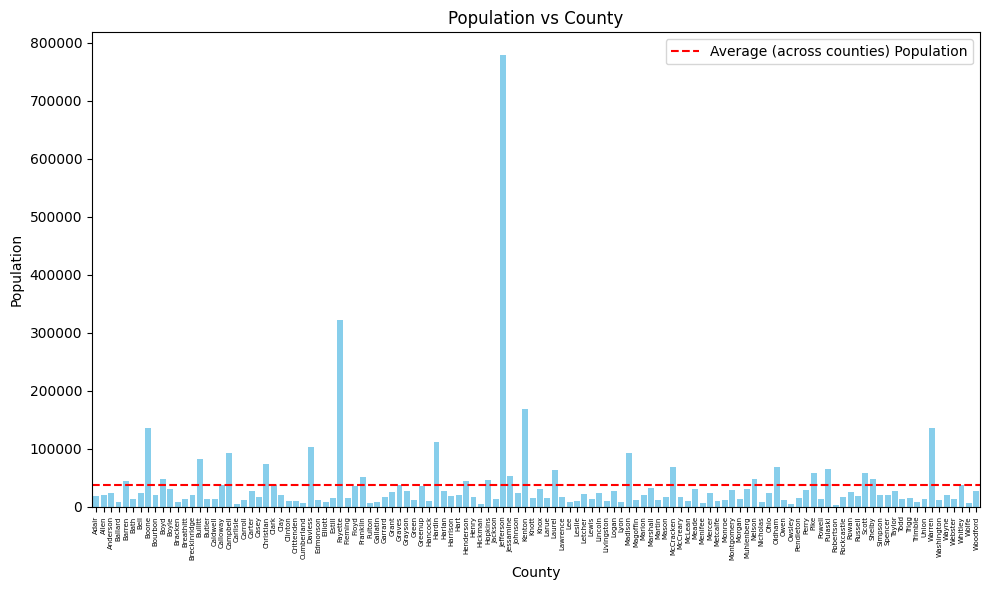


Average (across counties) Population: 37524

Average Radon Index: 2.18

Radon Index vs Count:
Radon Index
1     8
2    82
3    30
dtype: int64

Counties with Radon Index = 3 (worst):
    County  Radon Index
     Adair            3
     Allen            3
    Barren            3
   Bourbon            3
     Boyle            3
   Bullitt            3
     Casey            3
     Clark            3
Cumberland            3
   Fayette            3
  Franklin            3
     Green            3
  Harrison            3
      Hart            3
 Jefferson            3
 Jessamine            3
   Lincoln            3
    Marion            3
    Mercer            3
  Metcalfe            3
    Monroe            3
    Nelson            3
 Pendleton            3
   Pulaski            3
 Robertson            3
   Russell            3
     Scott            3
    Taylor            3
    Warren            3
  Woodford            3

Counties with Radon Index = 1 (best):
   County  Radon Index
  Ballard 

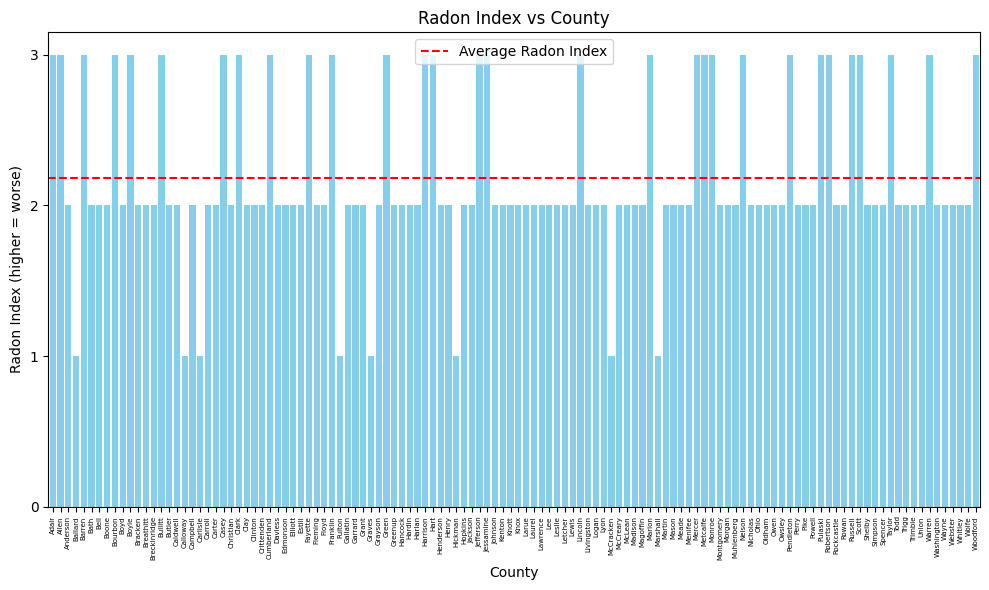

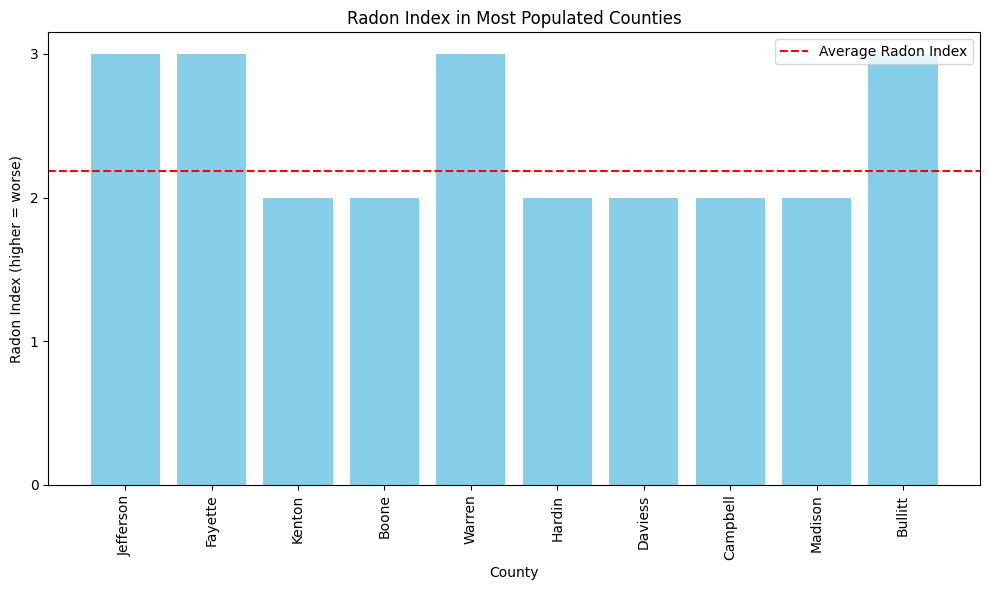


Percentage of Smokers vs County:
  County  Percentage of Smokers  Lower 95% CI (%)  Upper 95% CI (%)  Numerator  Denominator
   Adair                   29.1              22.1              37.4         58          224
   Allen                   33.0              24.2              43.1         61          221
Anderson                   23.6              14.3              36.3         21          129
 Ballard                   20.9              14.0              30.1         31          155
  Barren                   27.0              21.4              33.5         93          456

Percentage of Smokers vs County (sorted):
  County  Percentage of Smokers
  Estill                   46.7
Gallatin                   45.4
   Wolfe                   39.8
 Jackson                   39.8
    Bell                   38.7

Percentage of Smokers in Most Populated Counties:
   County  Percentage of Smokers
Jefferson                   22.0
  Fayette                   23.5
   Kenton                   2

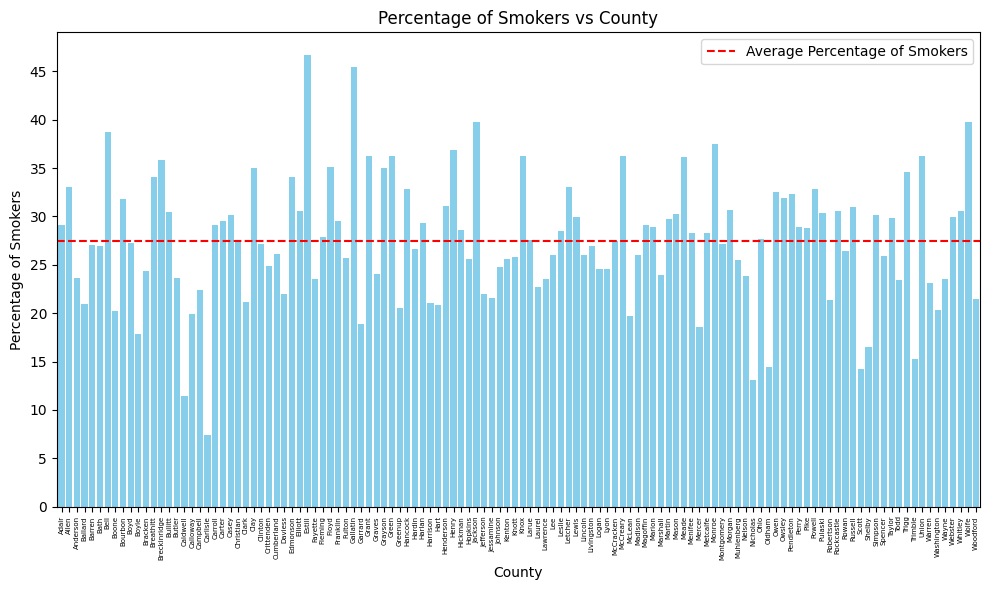

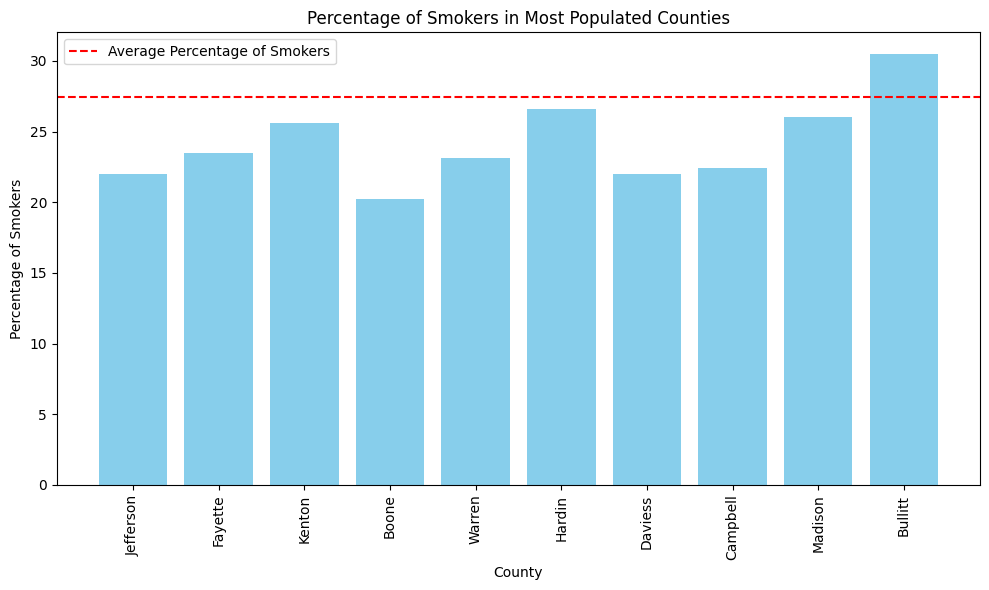


Row(s) with NaN in 'Cancer Incidence Rate (cases/100,000)' column:
   County  Cancer Incidence Rate (cases/100,000)
Robertson                                    NaN
The above county/counties won't be included when calculating average Cancer Incidence Rate (cases/100,000).

Counties with highest Cancer Incidence Rate (cases/100,000):
   County  Cancer Incidence Rate (cases/100,000)
   Owsley                                  118.1
   Martin                                   95.3
  Carroll                                   93.9
   Harlan                                   93.1
Breathitt                                   91.9

Counties with lowest Cancer Incidence Rate (cases/100,000):
  County  Cancer Incidence Rate (cases/100,000)
Woodford                                   43.4
   Scott                                   42.5
  Oldham                                   38.1
 Webster                                   37.9
   Boyle                                   35.7

Cancer Incidence Rat

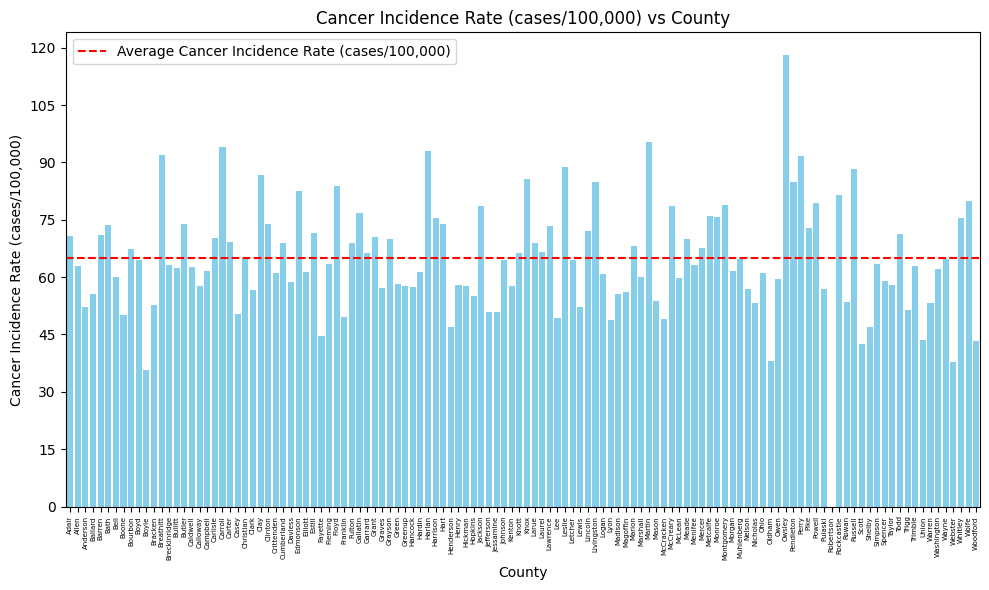

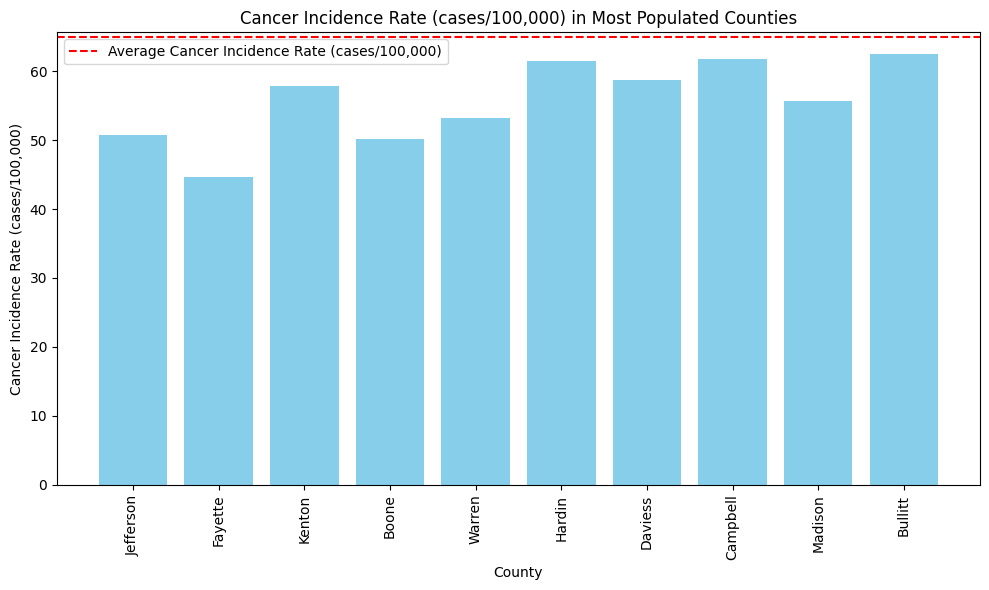


Average Cancer Incidence Rate vs Radon Index
             Average Cancer Incidence Rate  Count
Radon Index                                      
1                                59.537500      8
2                                66.667073     82
3                                61.813793     30

Average Cancer Incidence Rate vs Percentage of Smokers
            Average Cancer Incidence Rate  Count
Smoker_Bin                                      
(0, 10]                         70.100000      1
(10, 20]                        53.945455     11
(20, 30]                        63.813235     69
(30, 40]                        69.854054     37
(40, 50]                        74.100000      2


C:\Users\u8202\AppData\Local\Temp\ipykernel_5056\397472286.py:579: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_incidence_rate02 = merged_df.groupby('Smoker_Bin')['Cancer Incidence Rate (cases/100,000)'].mean()


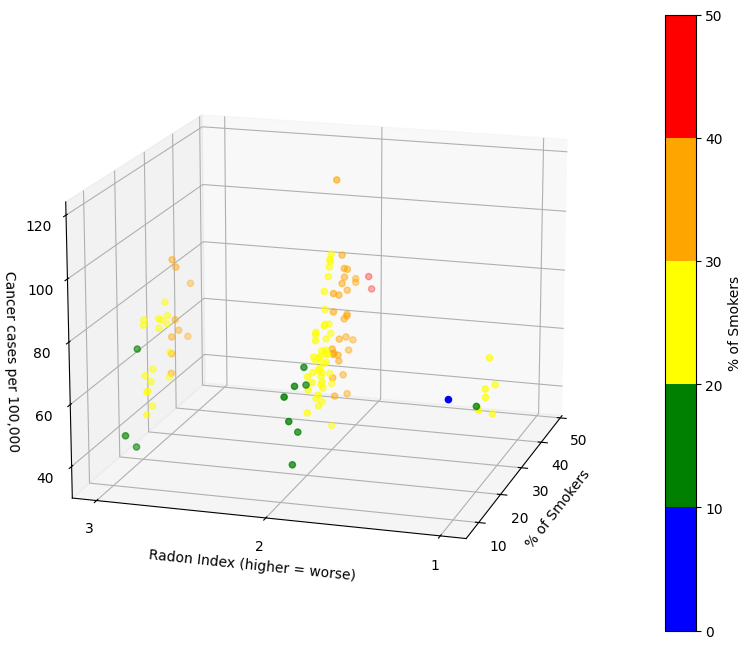

In [32]:
import pandas as pd
import requests
from io import BytesIO

# Define the URL
url1 = 'https://www.kentucky-demographics.com/samples/downloads/Kentucky_DemographicsByCounty_sample.xlsx'

# Send a GET request to the URL
response = requests.get(url1)

# Check if the request was successful
if response.status_code == 200:
    # Read the Excel file from the response content
    df1 = pd.read_excel(BytesIO(response.content))

    # Display the first few rows of the DataFrame
#    print(df1.head(10))
#    print("The request is successful.")
else:
    print("Failed to download the file. HTTP Error:", response.status_code)

# Print column names
#print(df1.columns)

# Select only columns A and F (by name)
df1 = df1[['Geography', 'Unnamed: 5']]

# Display the first few rows of the selected columns
#print(df1.head(10))

# Grab rows containing the word "County" in the "Geography" column
df1 = df1[df1['Geography'].str.contains('County', na=False)]

# Display the rows
#print(df1)

# Rename columns
df1 = df1.rename(columns={'Geography': 'County', 'Unnamed: 5': 'Population'})
#print(df1)

# Remove " County" from the "County" column
df1['County'] = df1['County'].str.replace(' County', '')

# print results
print("\nPopulation vs County (sorted by County)")
print(df1.head().to_string(index=False))

# Save to a CSV file without index
df1.to_csv('population.csv', index=False)

# Sort df by Population
df1_sorted = df1.sort_values(by='Population', ascending=False)

# print results
print("\nPopulation vs County (sorted by Population)")
print(df1_sorted.head().to_string(index=False))

# Save the sorted output to a CSV file without index
df1_sorted.to_csv('population_sorted.csv', index=False)

# Grab names of the most populated counties
most_populated_counties = df1_sorted.head(10)['County'].tolist()
print("\nThe most populated counties in Kentucky are:")
print(most_populated_counties)

# Print names of the most populated counties
#print("Names of the most populated counties:")
#for county in most_populated_counties:
#    print(county)

# Calculate the average population
average_population = df1['Population'].mean()
# Format the average population to two decimal places
average_population_formatted = "{:.0f}".format(average_population)

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# Plot bar diagram for Population vs County
plt.figure(figsize=(10, 6))
plt.bar(df1['County'], df1['Population'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Population vs County')
plt.xticks(rotation=90, fontsize=5)
# Set x-range
plt.xlim(left=-0.6, right=len(df1['County']) - 0.5)  # Adjust the limits as needed
# Set y-axis tick locator to show only integer values
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Adjust plot margins to move it up
plt.subplots_adjust(bottom=0.2)
# Add a dashed horizontal line for the average population
plt.axhline(y=average_population, color='red', linestyle='--', label='Average (across counties) Population')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()

plt.show()

print("\nAverage (across counties) Population:", average_population_formatted)





### get Radon data
### https://www.epa.gov/radon/epa-map-radon-zones-and-supplemental-information#datainfo

import pandas as pd

url2 = 'https://www.epa.gov/sites/default/files/2020-03/radon_zones-spreadsheet.xls'

# Read the Excel file into a DataFrame
df2 = pd.read_excel(url2)
#df2.to_csv('radon_USA.csv', index=False)

# Filter rows for Kentucky
df2 = df2.loc[df2.STATE == 'Kentucky']

# Select only the desired columns
df2 = df2.loc[:, ['County,State', 'Zone']]

# Rename columns
df2.columns = ['County', 'Radon_index(smaller=worse)']

# Remove ', KY' from the 'County' column
df2['County'] = df2['County'].str.replace(', KY', '')
# Replace/Swap values
df2["Radon_index(smaller=worse)"].replace({1: 3, 3: 1}, inplace=True)
# Rename column
df2.rename(columns={"Radon_index(smaller=worse)": "Radon Index"}, inplace=True)
# Let a column be int.
df2['Radon Index'] = df2['Radon Index'].astype(int)

# Save to CSV file
df2.to_csv('radon.csv', index=False)

#print("\nDataFrame saved to 'radon.csv' with modifications.")
#print(df2.dtypes)

# Sort DataFrame by particular columns
df2_sorted = df2.sort_values(by=['Radon Index', 'County'], ascending=[True, True])
df2_sorted.to_csv('radon_sorted.csv', index=False)

# Average Radon Index
average_radon = df2['Radon Index'].mean()
average_radon_formatted = "{:.2f}".format(average_radon)
print("\nAverage Radon Index:", average_radon_formatted)

# Count how many counties belong to each index
print("\nRadon Index vs Count:")
print(df2.groupby('Radon Index').size())

# Filter the DataFrame for radon index equal to 1 and 3
worst_df = df2[df2['Radon Index'] == 3]
best_df = df2[df2['Radon Index'] == 1]

# Print the filtered DataFrame
print("\nCounties with Radon Index = 3 (worst):")
print(worst_df.to_string(index=False))

print("\nCounties with Radon Index = 1 (best):")
print(best_df.to_string(index=False))

# Filter radon data for the most populated counties
radon_in_popular_counties = df2[df2['County'].isin(most_populated_counties)].copy()

# Create a categorical variable for County based on the order of most_populated_counties
radon_in_popular_counties['County'] = pd.Categorical(radon_in_popular_counties['County'], categories=most_populated_counties, ordered=True)

# Sort radon_in_popular_counties by County
radon_in_popular_counties = radon_in_popular_counties.sort_values(by='County')

print("\nRadon Index in Most Populated Counties:")
print(radon_in_popular_counties.to_string(index=False))

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df2['County'], df2['Radon Index'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Radon Index (higher = worse)')
plt.title('Radon Index vs County')
plt.xticks(rotation=90, fontsize=5)
# Set x-range
plt.xlim(left=-0.6, right=len(df2['County']) - 0.5)  # Adjust the limits as needed
# Set y-axis tick locator to show only integer values
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Adjust plot margins to move it up
plt.subplots_adjust(bottom=0.2)
# Add a dashed horizontal line for the average Radon_index
plt.axhline(y=average_radon, color='red', linestyle='--', label='Average Radon Index')
#plt.axhline(y=average_radon, color='red', linestyle='--')
# Add label for the average population
#plt.text(60, average_radon, f'Average Radon Index: {average_radon_formatted}', color='red', fontsize=10, ha='center')
#plt.text(56.5, 2.2, 'Average Radon Index', color='red', fontsize=10, ha='left', va='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(radon_in_popular_counties['County'], radon_in_popular_counties['Radon Index'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Radon Index (higher = worse)')
plt.title('Radon Index in Most Populated Counties')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Set y-axis tick locator to show only integer values
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Add a dashed horizontal line for the average Radon_index
plt.axhline(y=average_radon, color='red', linestyle='--', label='Average Radon Index')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()

plt.show()





### get smokers data
### view-source:https://kyibis.mc.uky.edu/ehl/dataportal/indicator/view/TobaccoSmokeAdult.Cnty.html?fbclid=IwAR2fSGhwHNnxgaOy6w5GwfUqjHXLCHSyfS0cVQpglf7Ix4jvCcxgiEoyXYU

import requests

# Define the URL
url3 = "https://kyibis.mc.uky.edu/ehl/dataportal/indicator/view/TobaccoSmokeAdult.Cnty.html?fbclid=IwAR2fSGhwHNnxgaOy6w5GwfUqjHXLCHSyfS0cVQpglf7Ix4jvCcxgiEoyXYU"

# Send a GET request to the URL
response = requests.get(url3)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the response
    html_content = response.text

    # Split the content by lines
    lines = html_content.split("\n")

    # Extract lines 31 to 2330
    extracted_lines = "\n".join(lines[30:2330])

    # Save the extracted content to a text file
    with open("extracted_content.txt", "w") as file:
        file.write(extracted_lines)

#    print("\nThe request is successful.")
else:
    print("\nFailed to fetch content from the URL.")

import re

# Open the original file and read its content
with open('extracted_content.txt', 'r') as readinput3:
    content = readinput3.read()

# Perform the substitution on the content
modified_content = re.sub('rowID', '"rowID"', content)

# Open a new file in write mode and write the modified content to it
with open('modified_file.txt', 'w') as modified_file:
    modified_file.write(modified_content)

#print("Modified content has been saved to modified_file.txt")

import json
with open('modified_file.txt', 'r') as file:
    data = json.load(file)

# Convert specified fields to float
for item in data:
    item['valueTitle'] = float(item['valueTitle'].replace('%', ''))
    item['valueLowerLimitTitle'] = float(item['valueLowerLimitTitle'].replace('%', ''))
    item['valueUpperLimitTitle'] = float(item['valueUpperLimitTitle'].replace('%', ''))
    item['valueNumeratorTitle'] = float(item['valueNumeratorTitle'].replace(',', ''))
    item['valueDenominatorTitle'] = float(item['valueDenominatorTitle'].replace(',', ''))

# Write the modified JSON to a file
with open('smoke.json', 'w') as file:
    json.dump(data, file, indent=5)

#print("\nModified format has been saved to smoke.json")

# Read a json format file
readinput = open('smoke.json')
data3 = json.load(readinput)
with open('smoke.csv', 'w') as f:
#print(data3)
  for entry in data3:
    County = entry['GeoCntyTitle']
    col02 = entry['valueTitle']
    col03 = entry['valueLowerLimitTitle']
    col04 = entry['valueUpperLimitTitle']
    col05 = entry['valueNumeratorTitle']
    col06 = entry['valueDenominatorTitle']
    #print(County, col02, col03, col04, col05, col06)
    f.write(f"{County},{col02},{col03},{col04},{col05:.0f},{col06:.0f}\n")

### add text in the first line of an existing file using Python
line = 'County,Percentage of Smokers,Lower 95% CI (%),Upper 95% CI (%),Numerator,Denominator'
with open('smoke.csv', 'r+') as file:
 file_data = file.read()
 file.seek(0, 0)
 file.write(line + '\n' + file_data)

#print("\nCSV file has been saved to smoke.csv")

import pandas as pd
df3=pd.read_csv("smoke.csv")
print("\nPercentage of Smokers vs County:")
print(df3.head().to_string(index=False))
#print(df3.dtypes)

df3_sorted = df3.sort_values(by="Percentage of Smokers", ascending=False)
df3_sorted = df3_sorted.loc[:, ['County', 'Percentage of Smokers']]
df3_sorted.to_csv('smoke_sorted.csv', index=False)
print("\nPercentage of Smokers vs County (sorted):")
print(df3_sorted.head().to_string(index=False))

# Filter smoking data for the most populated counties
smoker_in_popular_counties = df3_sorted[df3_sorted['County'].isin(most_populated_counties)].copy()

# Create a categorical variable for County based on the order of most_populated_counties
smoker_in_popular_counties['County'] = pd.Categorical(smoker_in_popular_counties['County'], categories=most_populated_counties, ordered=True)

# Sort smoke_in_popular_counties by County
smoker_in_popular_counties = smoker_in_popular_counties.sort_values(by='County')

print("\nPercentage of Smokers in Most Populated Counties:")
print(smoker_in_popular_counties.head().to_string(index=False))

# Filter out rows with "Kentucky"
filtered_df = df3[~df3['County'].isin(['Kentucky'])]
# average smokers %
average_smoker = filtered_df['Percentage of Smokers'].mean()
average_smoker_formatted = "{:.1f}".format(average_smoker)
print("\nAverage Percentage of Smokers:", average_smoker_formatted)

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['County'], filtered_df['Percentage of Smokers'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers vs County')
plt.xticks(rotation=90, fontsize=5)
# Set x-range
plt.xlim(left=-0.6, right=len(filtered_df['County']) - 0.5)  # Adjust the limits as needed
# Set y-axis tick locator to show only integer values
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Adjust plot margins to move it up
plt.subplots_adjust(bottom=0.2)
# Add a dashed horizontal line for the average smokers
plt.axhline(y=average_smoker, color='red', linestyle='--', label='Average Percentage of Smokers')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(smoker_in_popular_counties['County'], smoker_in_popular_counties['Percentage of Smokers'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers in Most Populated Counties')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Add a dashed horizontal line for the average smokers
plt.axhline(y=average_smoker, color='red', linestyle='--', label='Average Percentage of Smokers')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()

plt.show()

# delete files
import os
#if os.path.exists("extracted_content.txt"):
#  os.remove("extracted_content.txt")
#else:
#  print("extracted_content.txt does not exist")

#if os.path.exists("modified_file.txt"):
#  os.remove("modified_file.txt")
#else:
#  print("modified_file.txt does not exist")

#if os.path.exists("smoke.json"):
#  os.remove("smoke.json")
#else:
#  print("smoke.json does not exist")





### get cancer data
### https://statecancerprofiles.cancer.gov/incidencerates/index.php?stateFIPS=21&areatype=county&cancer=047&race=00&sex=0&age=001&stage=211&type=incd&sortVariableName=rate&sortOrder=default&output=0#results

import pandas as pd

url4 = 'https://statecancerprofiles.cancer.gov/incidencerates/index.php?stateFIPS=21&areatype=county&cancer=047&race=00&sex=0&age=001&stage=211&type=incd&sortVariableName=rate&sortOrder=default&output=0&fbclid=IwAR0Fwok2ABQLH_Wmovm_Cj4UGPnyjj3fKQC3GzpV8tcfNPdyodKgbpq0d4A#results'
dfs = pd.read_html(url4)
df4 = dfs[0]
#df4.to_csv('cancer00.csv', index=False)

# Split the second column into three columns
split_columns = df4.iloc[:, 1].str.split(expand=True)
df4['Column1'] = pd.to_numeric(split_columns[0], errors='coerce')
df4['Column2'] = split_columns[1]
df4['Column3'] = split_columns[2]
df4['Column2'] = df4['Column2'].str.replace('\(|,', '', regex=True).astype(float)
df4['Column3'] = df4['Column3'].str.replace('\)','', regex=True).astype(float)

# Drop the original second column
cols = [1]
df4.drop(df4.columns[cols],axis=1,inplace=True)

# Move columns
df4.insert(1, 'Column1', df4.pop('Column1'))
df4.insert(2, 'Column2', df4.pop('Column2'))
df4.insert(3, 'Column3', df4.pop('Column3'))

# Split the 5th column into three columns
split_columns = df4.iloc[:, 4].str.split(expand=True)
df4['Column4'] = pd.to_numeric(split_columns[0], errors='coerce')
df4['Column5'] = split_columns[1]
df4['Column6'] = split_columns[2]
df4['Column5'] = df4['Column5'].str.replace('\(|,', '', regex=True).astype(float)
df4['Column6'] = df4['Column6'].str.replace('\)','', regex=True).astype(float)

# Drop the original 5th column
cols = [4]
df4.drop(df4.columns[cols],axis=1,inplace=True)

# Move columns
df4.insert(4, 'Column4', df4.pop('Column4'))
df4.insert(5, 'Column5', df4.pop('Column5'))
df4.insert(6, 'Column6', df4.pop('Column6'))

# Make last two columns float
df4['Average Annual Count'] = df4['Average Annual Count'].replace('3 or fewer', 3).astype(float)
#df4['Average Annual Count'] = df4['Average Annual Count'].replace('3 or fewer', float('NaN')).astype(float)
df4['Percent of Cases with Late Stage'] = df4['Percent of Cases with Late Stage'].replace('*', float('NaN')).astype(float)

# Replace specific strings
replacements = {'Kentucky  3': 'Kentucky', 'US \(SEER\+NPCR\)  1': 'US (SEER+NPCR)', ' County  7': ''}
df4['County'].replace(replacements, regex=True, inplace=True)

# Rename columns
df4.rename(columns={'Column1': 'Cancer Incidence Rate (cases/100,000)', 'Column2': 'Lower 95% Confidence Interval', 'Column3': 'Upper 95% Confidence Interval', 'Column4': 'CI*Rank', 'Column5': 'Lower CI (CI*Rank)', 'Column6': 'Upper CI (CI*Rank)'}, inplace=True)

# Save to CSV file
df4.to_csv('cancer_sorted.csv', index=False)
#print("\nDataFrame saved to 'cancer_sorted.csv' with modifications.")
#print(df4.dtypes)

# Ignore two rows, "Kentucky" and "US (SEER+NPCR)"
df4_2 = df4[~df4['County'].isin(["Kentucky", "US (SEER+NPCR)"])]
# print out particular columns
df4_2 = df4_2.loc[:, ['County', 'Cancer Incidence Rate (cases/100,000)']]
# Filter rows with NaN values in "Cancer Incidence Rate (cases/100,000)" column
nan_rows = df4_2[df4_2['Cancer Incidence Rate (cases/100,000)'].isna()]
# Print rows with NaN values
print("\nRow(s) with NaN in 'Cancer Incidence Rate (cases/100,000)' column:")
print(nan_rows.to_string(index=False))
print("The above county/counties won't be included when calculating average Cancer Incidence Rate (cases/100,000).")
# Ignore rows with NaN values in "Cancer Incidence Rate (cases/100,000)" column
df4_2 = df4_2.dropna(subset=["Cancer Incidence Rate (cases/100,000)"])
# Print the first few rows without index
print("\nCounties with highest Cancer Incidence Rate (cases/100,000):")
print(df4_2.head().to_string(index=False))
# Print the last few rows without index
print("\nCounties with lowest Cancer Incidence Rate (cases/100,000):")
print(df4_2.tail().to_string(index=False))

# Sort DataFrame by "County"
df4_sorted = df4.sort_values(by="County", ascending=True)

# Function to move a row to a specific row number based on row name
def move_row_to_specific_row_by_name(df4_sorted, row_name, new_row_index):
    row_to_move = df4_sorted[df4_sorted["County"] == row_name]
    df4_sorted = df4_sorted.drop(df4_sorted[df4_sorted["County"] == row_name].index)
    df4_sorted = pd.concat([df4_sorted.iloc[:new_row_index], row_to_move, df4_sorted.iloc[new_row_index:]], ignore_index=True)
    return df4_sorted

# Move row with name "Kentucky" to row number 2
df4_sorted = move_row_to_specific_row_by_name(df4_sorted, "Kentucky", 0)
df4_sorted = move_row_to_specific_row_by_name(df4_sorted, "US (SEER+NPCR)", 1)

# Save to CSV file
df4_sorted.to_csv('cancer.csv', index=False)
#print("\nDataFrame saved to 'cancer.csv' with modifications.")

# Filter cancer data for the most populated counties
cancer_in_popular_counties = df4_2[df4_2['County'].isin(most_populated_counties)].copy()

# Create a categorical variable for County based on the order of most_populated_counties
cancer_in_popular_counties['County'] = pd.Categorical(cancer_in_popular_counties['County'], categories=most_populated_counties, ordered=True)

# Sort cancer_in_popular_counties by County
cancer_in_popular_counties = cancer_in_popular_counties.sort_values(by='County')

print("\nCancer Incidence Rate (cases/100,000) in Most Populated Counties:")
print(cancer_in_popular_counties.to_string(index=False))

average_cancer = df4_2['Cancer Incidence Rate (cases/100,000)'].mean()
average_cancer_formatted = "{:.1f}".format(average_cancer)
print("\nAverage Cancer Incidence Rate (cases/100,000):", average_cancer_formatted)

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Filter out rows with "Kentucky" and "US (SEER+NPCR)"
df4_sorted_2 = df4_sorted[~df4_sorted['County'].isin(['Kentucky', 'US (SEER+NPCR)'])]
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df4_sorted_2['County'], df4_sorted_2['Cancer Incidence Rate (cases/100,000)'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Cancer Incidence Rate (cases/100,000)')
plt.title('Cancer Incidence Rate (cases/100,000) vs County')
plt.xticks(rotation=90, fontsize=5)
# Set x-range
plt.xlim(left=-0.6, right=len(filtered_df['County']) - 0.5)  # Adjust the limits as needed
# Set y-axis tick locator to show only integer values
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Adjust plot margins to move it up
plt.subplots_adjust(bottom=0.2)
# Add a dashed horizontal line for the average cancer rate
plt.axhline(y=average_cancer, color='red', linestyle='--', label='Average Cancer Incidence Rate (cases/100,000)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(cancer_in_popular_counties['County'], cancer_in_popular_counties['Cancer Incidence Rate (cases/100,000)'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Cancer Incidence Rate (cases/100,000)')
plt.title('Cancer Incidence Rate (cases/100,000) in Most Populated Counties')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Add a dashed horizontal line for the average cancer rate
plt.axhline(y=average_cancer, color='red', linestyle='--', label='Average Cancer Incidence Rate (cases/100,000)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()

plt.show()





### merge 3 tables
import pandas as pd

df_smoke01 = pd.read_csv("smoke.csv")
df_cancer01 = pd.read_csv("cancer_sorted.csv")
df_radon01 = pd.read_csv("radon.csv")

df_smoke02 = df_smoke01.loc[:, ['County', 'Percentage of Smokers']]
df_cancer02 = df_cancer01.loc[:, ['County', 'Cancer Incidence Rate (cases/100,000)']]
df_radon02 = df_radon01.loc[:, ['County', 'Radon Index']]

# Merge the tables on the "County" column
merged_df = pd.merge(df_smoke02, df_cancer02, on="County")
merged_df = pd.merge(merged_df, df_radon02, on="County")

# Print the combined table
#print("\nMerged table:")
#print(merged_df.head().to_string(index=False))
merged_df.to_csv('merged.csv', index=False)

# Group data by "Radon Index" and calculate both mean and count
average_incidence_rate01 = merged_df.groupby("Radon Index").agg({"Cancer Incidence Rate (cases/100,000)": "mean", "County": "count"})
# Rename columns for clarity
average_incidence_rate01.rename(columns={"Cancer Incidence Rate (cases/100,000)": "Average Cancer Incidence Rate", "County": "Count"}, inplace=True)
print("\nAverage Cancer Incidence Rate vs Radon Index")
print(average_incidence_rate01.to_string(index=True))

# Create bins for "Percentage Current Smokers (%)"
bins = [0, 10, 20, 30, 40, 50]
# Group data by bins and calculate average "Cancer Incidence Rate (cases/100,000)" for each bin
merged_df['Smoker_Bin'] = pd.cut(merged_df['Percentage of Smokers'], bins=bins)
#merged_df.to_csv('merged2.csv', index=False)
average_incidence_rate02 = merged_df.groupby('Smoker_Bin', observed=False)['Cancer Incidence Rate (cases/100,000)'].mean()
#print(average_incidence_rate02.head().to_string(index=False))
# Count number of data points in each bin
count_per_bin = merged_df['Smoker_Bin'].value_counts()
# Combine average incidence rate and count per bin into a DataFrame
result_df = pd.concat([average_incidence_rate02, count_per_bin], axis=1)
result_df.columns = ['Average Cancer Incidence Rate', 'Count']
print("\nAverage Cancer Incidence Rate vs Percentage of Smokers")
print(result_df.to_string(index=True))

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap

# Drop rows with missing values
merged_df = merged_df.dropna()

# Extract x, y, z values
x = merged_df["Percentage of Smokers"]
y = merged_df["Radon Index"]
z = merged_df["Cancer Incidence Rate (cases/100,000)"]

# Create a colormap for Percentage Current Smokers
smoker_cmap = ListedColormap(['blue', 'green', 'yellow', 'orange', 'red'])

# Create 3D plot
#fig = plt.figure()
fig = plt.figure(figsize=(10, 8))  # Adjust the size here (width, height)
ax = fig.add_subplot(111, projection='3d')

# Plot data points with color based on "Percentage Current Smokers"
sc = ax.scatter(x, y, z, c=x, cmap=smoker_cmap, vmin=0, vmax=50)

# Set labels
ax.set_xlabel("% of Smokers")
ax.set_ylabel("Radon Index (higher = worse)")
ax.set_zlabel("Cancer cases per 100,000")

# Set y-axis tick locator to show only integer values
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set specific values for x-axis ticks
ax.set_xticks([10, 20, 30, 40, 50])

# Change viewing angle (elevation, azimuth)
ax.view_init(elev=16, azim=-163)

# Add colorbar for "Percentage Current Smokers"
cbar = plt.colorbar(sc, ticks=[0, 10, 20, 30, 40, 50])
cbar.set_label("% of Smokers")

# Move the colorbar
#cbar.ax.yaxis.set_label_position('left')  # Move the label to the left side
#cbar.ax.yaxis.set_ticks_position('left')  # Move the ticks to the left side
#cbar.set_label("% of Smokers", labelpad=-60)  # Adjust the distance between the colorbar and its label

# Make the colorbar smaller
#cbar.ax.yaxis.set_ticks_position('right')  # Move the ticks to the right side
#cbar.ax.yaxis.set_tick_params(width=0)  # Hide the tick marks
#cbar.ax.tick_params(axis='y', width=0)  # Hide the tick marks
#cbar.ax.figure.canvas.draw()  # Redraw the colorbar to update the changes

# Show plot
plt.show()


